In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [5]:
train_dataset = train.flow_from_directory("/content/drive/MyDrive/TB_Chest/train",
                                          target_size=(200, 200),
                                          batch_size=10,
                                          class_mode='binary')
validation_dataset = validation.flow_from_directory("/content/drive/MyDrive/TB_Chest/valid",
                                          target_size=(200, 200),
                                          batch_size=10,
                                          class_mode='binary')


Found 2791 images belonging to 2 classes.
Found 630 images belonging to 2 classes.


In [6]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=10)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 198, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 97, 97, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 46, 46, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 67712)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       8,667,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,760,641 (33.42 MB)

 Trainable params: 8,760,641 (33.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


280/280 ━━━━━━━━━━━━━━━━━━━━ 941s 3s/step - accuracy: 0.8832 - loss: 0.3461 - val_accuracy: 0.9492 - val_loss: 0.1401
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 42s 146ms/step - accuracy: 0.9697 - loss: 0.0802 - val_accuracy: 0.9619 - val_loss: 0.1023
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 45s 156ms/step - accuracy: 0.9744 - loss: 0.0742 - val_accuracy: 0.9794 - val_loss: 0.0619
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 81s 153ms/step - accuracy: 0.9631 - loss: 0.1196 - val_accuracy: 0.9667 - val_loss: 0.0923
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 45s 159ms/step - accuracy: 0.9755 - loss: 0.0706 - val_accuracy: 0.9746 - val_loss: 0.0979
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 47s 163ms/step - accuracy: 0.9825 - loss: 0.0566 - val_accuracy: 0.9794 - val_loss: 0.1019
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 43s 151ms/step - accuracy: 0.9861 - loss: 0.0358 - val_accuracy: 0.9762 - val_loss: 0.0675
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 42s 149ms/step - accuracy: 0.9827 - loss: 0.0439 - val_a

In [8]:
test_datagen = ImageDataGenerator(rescale=1./255)  # You can add more augmentation techniques if needed

# Load the test dataset
test_dataset = test_datagen.flow_from_directory("/content/drive/MyDrive/TB_Chest/test",
                                                target_size=(200, 200),
                                                batch_size=10,  # Adjust batch size as needed
                                                class_mode='binary',  # Assuming binary classification
                                                shuffle=False)  # Important: Do not shuffle for evaluation

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_dataset)

print(f"Test accuracy: {test_accuracy*100:.2f}%")


Found 630 images belonging to 2 classes.
63/63 ━━━━━━━━━━━━━━━━━━━━ 42s 674ms/step - accuracy: 0.9920 - loss: 0.0321
Test accuracy: 97.78%


In [9]:
model.save('/content/drive/MyDrive/simple_model.h5')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step


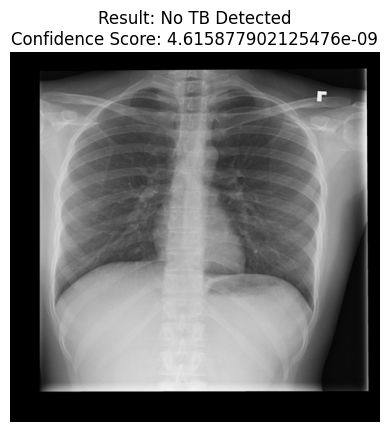

In [15]:
loaded_model = keras.models.load_model('/content/drive/MyDrive/simple_model.h5')
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img,(200, 200))
    img = img / 255.0  # Normalize pixel values to between 0 and 1
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img


def predict_tb_with_image(image_path):
    preprocessed_img = preprocess_image(image_path)
    prediction = loaded_model.predict(preprocessed_img)
    confidence_score = prediction[0][0]

    if confidence_score > 0.5:
        result = "TB Detected"
    else:
        result = "No TB Detected"

    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert image to RGB format

    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f"Result: {result}\nConfidence Score: {confidence_score}")
    plt.show()

image_path = "/content/drive/MyDrive/TB_Chest/test/Normal/Normal-437.png"
predict_tb_with_image(image_path)



# Pre Trained model Usage

In [16]:
# Define data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1/255)


In [31]:
train_dataset = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/TB_Chest/train",
    target_size=(256, 256),
    batch_size=10,
    class_mode='binary'
)

# Load the validation data (without augmentation)
validation_dataset = validation_datagen.flow_from_directory(
    "/content/drive/MyDrive/TB_Chest/valid",
    target_size=(256, 256),
    batch_size=10,
    class_mode='binary'
)

Found 2791 images belonging to 2 classes.
Found 630 images belonging to 2 classes.


In [32]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Define which layers to freeze and which to unfreeze
freeze_layers = 10 # Example: Freeze the first 15 layers, and unfreeze the rest

# Freeze the specified layers
for layer in base_model.layers[:freeze_layers]:
    layer.trainable = False
# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained model
model = Sequential([
    base_model,  # Include the pre-trained VGG16 model
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model using augmented data
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=10)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 8, 8, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       4,194,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,909,249 (72.13 MB)

 Trainable params: 4,194,561 (16.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


280/280 ━━━━━━━━━━━━━━━━━━━━ 154s 321ms/step - accuracy: 0.8866 - loss: 0.2751 - val_accuracy: 0.9746 - val_loss: 0.0854
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 90s 316ms/step - accuracy: 0.9523 - loss: 0.1260 - val_accuracy: 0.9873 - val_loss: 0.0546
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 140s 308ms/step - accuracy: 0.9635 - loss: 0.0993 - val_accuracy: 0.9905 - val_loss: 0.0425
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 91s 319ms/step - accuracy: 0.9621 - loss: 0.1057 - val_accuracy: 0.9841 - val_loss: 0.0474
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 87s 304ms/step - accuracy: 0.9758 - loss: 0.0686 - val_accuracy: 0.9841 - val_loss: 0.0408
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 91s 319ms/step - accuracy: 0.9641 - loss: 0.0887 - val_accuracy: 0.9762 - val_loss: 0.0579
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 139s 305ms/step - accuracy: 0.9723 - loss: 0.0831 - val_accuracy: 0.9794 - val_loss: 0.0492
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 142s 310ms/step - accuracy: 0.9730 - loss: 0.0678 -

In [34]:
test_datagen = ImageDataGenerator(rescale=1./255)  # You can add more augmentation techniques if needed

# Load the test dataset
test_dataset = test_datagen.flow_from_directory("/content/drive/MyDrive/TB_Chest/test",
                                                target_size=(256, 256),
                                                batch_size=10,  # Adjust batch size as needed
                                                class_mode='binary',  # Assuming binary classification
                                                shuffle=True)  # Important: Do not shuffle for evaluation

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_dataset)

print(f"Test accuracy: {test_accuracy*100:.2f}%")


Found 630 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 192ms/step - accuracy: 0.9704 - loss: 0.1059
Test accuracy: 96.83%


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step


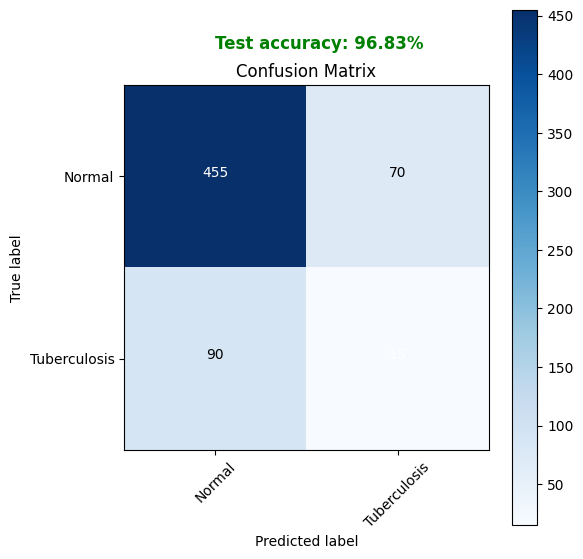

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming 'y_true' is the true labels and 'y_pred' is the predicted labels
y_true = test_dataset.classes  # True labels
y_pred = (model.predict(test_dataset) > 0.5).astype(int).flatten()  # Predicted labels (assuming binary classification)

# Generate confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion Matrix')
plt.colorbar()

classes = list(test_dataset.class_indices.keys())
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(confusion_mtx[i, j]), horizontalalignment='center', color='white' if i == j else 'black')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

# Display the accuracy with some vertical space
plt.text(0, -0.7, f"Test accuracy: {test_accuracy*100:.2f}%", fontsize=12, fontweight='bold', color='green')

plt.show()


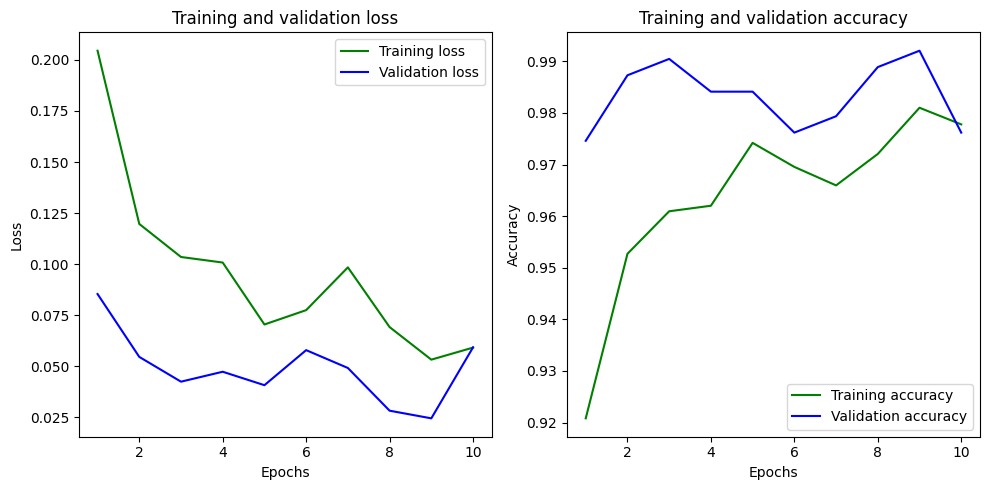

In [36]:
import matplotlib.pyplot as plt

# Get the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'g', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


In [39]:
model.save('/content/drive/MyDrive/pretrained_model.h5')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


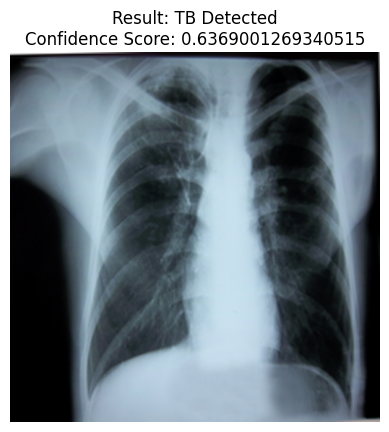

In [43]:
loaded_model = keras.models.load_model('/content/drive/MyDrive/pretrained_model.h5')


def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (256, 256))
    img = img / 255.0  # Normalize pixel values to between 0 and 1
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img


def predict_tb_with_image(image_path):
    preprocessed_img = preprocess_image(image_path)
    prediction = loaded_model.predict(preprocessed_img)
    confidence_score = prediction[0][0]

    if confidence_score > 0.5:
        result = "TB Detected"
    else:
        result = "No TB Detected"

    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert image to RGB format

    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f"Result: {result}\nConfidence Score: {confidence_score}")
    plt.show()

image_path = "/content/drive/MyDrive/TB_Chest/valid/Tuberculosis/Tuberculosis-662.png"
predict_tb_with_image(image_path)

